About Kontali

Kontali is an independent world-leading provider of data and analyses covering large parts of global aquaculture and fisheries. Our mission is to always have the deepest understanding of this realm and the species within it, the connections between them and to share our knowledge of seafood to create a more balanced world above and below the surface.

Kontali was founded in 1987 and had up until 2020 the head count was 10-15 people. The business areas were split between ad hoc consultancy and subscriptions on PDF reports published on a weekly, bi-weekly and monthly basis. In 2020 Arendal Fossekompani (AFK) acquired 70% of the company with the goal of transforming Kontali into a data-driven technology company. In May 2021 the Tech department along with a Sales & Marketing department were established with the goal of establishing Kontali as the global reference point for seafood insight and data. With a steady growth since, the Tech department as of January 2023 counts 15 persons including 5 developers, 4 data scientists, 2 data analysts, 2 data engineers, a product manager and the CTO. On the company level Kontali has grown from 13 people in early 2020 to 35 by January 2023.

The mission the Tech department was given was to establish a scalable technology platform that efficiently collects and utilizes data, and automates operations, models, and products. The original roadmap from the company strategy of February 2020 suggested a launch of a minimum viable product (MVP) in mid 2023. Starting in May 2020 meant 3 years of development until launch, but the Tech department surpassed those expectations and launched the MVP of Edge by Kontali in September 2022 - cutting the time to market in half.

The short-term focus on Edge is to cover the salmonid PDF publications. The end of life for most of our salmonid reports is set to April and May 2023, which means that the current customer subscriptions of these products will be moved over to Edge during Q1 2023. Since salmonids are the basis of some 85% of Kontali’s current income it was a natural choice to focus on these species to start with. The next commercial species that will be covered by Edge is shrimp, and specifically warm-water shrimp to begin with.

The long-term vision for Edge is to give a complete and exclusive story about the world of seafood, so that our customers can make faster and better decisions with confidence. To deliver on that vision we will focus on four key strategies:

    Unique content: We will utilise our unique data and analyst's insights to give our users the complete and forward-looking story with extensive coverage of the world of seafood
    Convenience: Using the portal, getting hold of the data, insights and answers to questions and uncertainties should be easy and fun. The user experience should be relevant, feel personal and create a desire to explore more.
    State-of-the-art model frameworks: New, automated, and more advanced model frameworks with added flexibility for both our analysts and the output to customers will delight our customers by increasing our unique content and enable our analysts to create new and better insights and forecasts
    Margin enhancement: Reducing cost of internal manual work by automating ETL and data validation. We will also explore alternative segmentations of our customer base and increase willingness to pay by productizing these segments (short/mid/long).

## Assignment – Part 1

Assume that you step into the role of Lead Data Scientist in Kontali on May 1st, 2023. Describe (using whatever supporting material or presentation material you prefer) how you will approach the role and what you will focus on during the first 100 days.

## Assignment – Part 2
To estimate the total biomass in a salmon production facility, the operators will take a number of samples in each cage that they measure to estimate the average size and weight in each cage. Combined with the estimates of the quantity they can calculate the total biomass for each cage and total biomass for a facility.

Based on the empirical data, we have created an estimated weight distribution for each average weight in 0.1kg intervals. We assume the weight distribution of fish in a cage to be normally distributed with a given mean and standard deviation. The pairs of distribution parameters are displayed in Table 1.

Example:

“Operators take 14 fish samples from a fish cage, where the average weight of the samples is 2.136 kg. From the models we know that the estimated quantity in that cage is 132 000. The assumed biomass in that cage is 2.136 * 132 000 = 281 952 kg = 282 t.

From the background data we see that the closest average weight data point is 2.1 kg, with a standard deviation of 0.475, which gives a normal distribution we can use to further analyse that cage”

Kontali has a production model, where we estimate the number of individuals and the total biomass. Table 2 contains an example of the estimated number of individual fish and total biomass in a single cage for each month of the given year.

How would you go about calculating the total harvestable biomass (fish larger than 4kg) for these months?

1. What is the average weight of these (harvestable) fish?
2. Assuming you only know the biomass and number of individuals at the start of the first month (from Table 2). Assume a growth rate of 11,2%. How much will be harvested during the next 12 months, if we assume that all fish over 4kg will be harvested at the end of each month?
3. Do you see any other interesting questions we could try to answer with these or similar kinds of data?

The source code must be made available on GitHub, Gitlab, Bitbucket or similar code sharing platforms with a description of how to run the code.

The implementation can be done using any tool or language you’d like, but it’s preferrable to stick to familiar languages like Python, R or Julia.

The solution to the assignment should be presented both on a technical and a non-technical level. For the technical presentation we expect a walk-through of the implementation with an explanation behind the choices made. For the non-technical presentation, you should picture yourself presenting the findings, analysis, and solution to a domain expert or similar without any data or computer science background.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import truncnorm
import seaborn as sns

# Q1

In [2]:
biomass = 281952
avg = 2.1
std = 0.475

threshold = 4

In [3]:
z = (threshold - avg)/std
print(f'Z score is {z}')

Z score is 4.0


In [4]:
proba_greater = 1 - norm.cdf(z)
print(f'Probability of harvestable fish: {proba_greater}')

Probability of harvestable fish: 3.167124183311998e-05


In [5]:
proba_greater * 100

0.003167124183311998

In [6]:
expected_production = proba_greater * biomass
print(f'Expected total nb of kg to be harvested: {expected_production}')

Expected total nb of kg to be harvested: 8.929769977331844


## The average weight of harvestable fish 
Can be computed by selecting only the samples above the threshold and estimating their avearage. This can be performed using a truncated normal distribution.

In [7]:
standard_truncated_mean = truncnorm.stats(z, np.inf, moments='m')
print(f'Standard truncated mean {standard_truncated_mean}')

Standard truncated mean 4.225607144489479


In [8]:
z = (threshold - avg)/std

In [9]:
expected_truncated_mean = std * standard_truncated_mean + avg
print(f'Expected truncated mean {expected_truncated_mean}')

Expected truncated mean 4.1071633936325025


## Visualize the distribution

In [10]:
simulated = np.random.normal(loc = avg, scale = std, size = 10000)

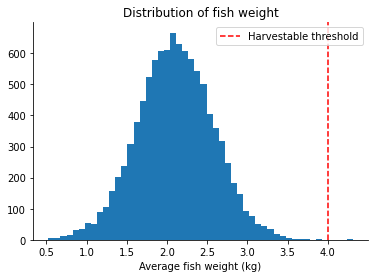

In [11]:
plt.hist(simulated, bins = 50)
plt.axvline(x = threshold, c = 'red', linestyle = '--', label = 'Harvestable threshold')
plt.title('Distribution of fish weight')
plt.xlabel('Average fish weight (kg)')
sns.despine()
plt.legend()

# Create method to predict the harvested biomass

In [12]:
def compute_expected_harvest(biomass, avg, std, threshold = 4):
    """
    Computes the expected harvest in kg by multiplying the total biomass 
    by the expected probability of harvestable fish.
    """
    z = (threshold - avg)/std
    proba_greater = 1 - norm.cdf(z)
    return proba_greater * biomass

# Q2

In [13]:
table1 = pd.read_excel('Technical Assignment - Background data.xlsx', sheet_name='Table 1')
table1

,avg,std
0,1.5,0.400
1,1.6,0.410
2,1.7,0.420
3,1.8,0.430
4,1.9,0.445
...,...,...
56,7.1,0.100
57,7.2,0.100
58,7.3,0.100
59,7.4,0.100


In [14]:
table2 = pd.read_excel('Technical Assignment - Background data.xlsx', sheet_name='Table 2')
table2

,Month,Number of individuals,Biomass
0,Jan,156077,317895
1,Feb,153515,348611
2,Mar,149766,372454
3,Apr,143869,392922
4,May,135885,404041
5,Jun,121411,381604
6,Jul,103747,348771
7,Aug,82179,296803
8,Sep,61159,237555
9,Oct,43519,178965


In [15]:
table1['avg'] = table1['avg'].round(1)

map_weight_std = dict(zip(*table1.values.T))

# Simulate the growth with a recurrent function

In [16]:
growth_rate = 1.112
nb_individuals = 156077
biomass = 317895
nb_months = 12
inital_mean = biomass/nb_individuals

In [17]:
def simulate_month(inital_mean, biomass, growth_rate):
    """
    Estimates the harvest in kg and the evolution of the remaining biomass
    as well as the mean which is subject to given growth rate
    """
    mean_end_month = inital_mean * growth_rate
    rounded_mean = int(mean_end_month * 10) / 10

    std = map_weight_std[rounded_mean]

    biomass_end_month = biomass * growth_rate

    harvested = compute_expected_harvest(biomass_end_month,
                                         rounded_mean,
                                         std,
                                         threshold=4)

    new_biomass = biomass_end_month - harvested

    print(
        f'\n\n>> inital_mean {inital_mean}, mean_end_month {mean_end_month}, rounded_mean {rounded_mean}, '
        +
        f'std {std}\nbiomass_end_month {biomass_end_month}, harvested {harvested}, new_biomass {new_biomass}'
    )
    return harvested, mean_end_month, new_biomass

In [18]:
results = pd.DataFrame(columns = ['month', 'harvested', 'biomass', 'mean'])
results.loc[results.shape[0]] = [0, 0, biomass, inital_mean]
for i in range(1, nb_months):
    harvested, inital_mean, biomass = simulate_month(inital_mean, biomass, growth_rate)
    results.loc[results.shape[0]] = [i, harvested, biomass, inital_mean]



>> inital_mean 2.0367831262774145, mean_end_month 2.264902836420485, rounded_mean 2.2, std 0.495
biomass_end_month 353499.24000000005, harvested 48.87372951376571, new_biomass 353450.36627048627


>> inital_mean 2.264902836420485, mean_end_month 2.5185719540995795, rounded_mean 2.5, std 0.56
biomass_end_month 393036.8072927808, harvested 1452.997344776097, new_biomass 391583.80994800467


>> inital_mean 2.5185719540995795, mean_end_month 2.8006520129587327, rounded_mean 2.8, std 0.64
biomass_end_month 435441.19666218123, harvested 13235.828141241993, new_biomass 422205.36852093926


>> inital_mean 2.8006520129587327, mean_end_month 3.114325038410111, rounded_mean 3.1, std 0.73
biomass_end_month 469492.36979528447, harvested 51085.87909705217, new_biomass 418406.4906982323


>> inital_mean 3.114325038410111, mean_end_month 3.463129442712044, rounded_mean 3.4, std 0.835
biomass_end_month 465268.0176564344, harvested 109898.70077115674, new_biomass 355369.3168852776


>> inital_mean 3.4

In [20]:
results['total_harvest'] = results['harvested'].cumsum()

In [21]:
results

,month,harvested,biomass,mean,total_harvest
0,0.0,0.000000,317895.000000,2.036783,0.000000
1,1.0,48.873730,353450.366270,2.264903,48.873730
2,2.0,1452.997345,391583.809948,2.518572,1501.871074
3,3.0,13235.828141,422205.368521,2.800652,14737.699216
4,4.0,51085.879097,418406.490698,3.114325,65823.578313
5,5.0,109898.700771,355369.316885,3.463129,175722.279084
6,6.0,165952.111148,229218.569228,3.851000,341674.390232
7,7.0,145271.607476,109619.441506,4.282312,486945.997708
8,8.0,86364.384199,35532.434756,4.761931,573310.381907
9,9.0,31949.225632,7562.841817,5.295267,605259.607538


In [22]:
total_harvest = results['harvested'].sum()
print(f'Total harvest over {nb_months}: {total_harvest}')

Total harvest over 12: 613732.4137803791


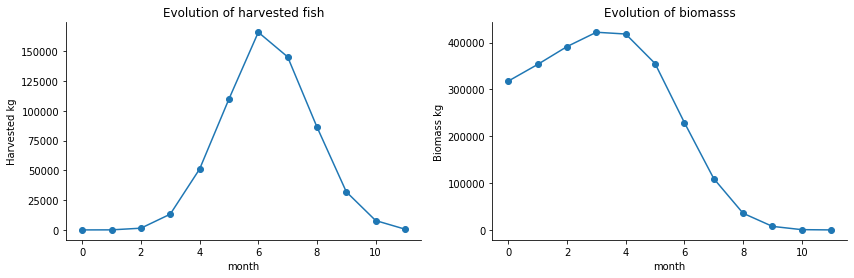

In [23]:
plt.figure(figsize = (14, 4))
plt.subplot(121)
plt.plot(results['harvested'], marker = 'o')
plt.xlabel('month')
plt.ylabel('Harvested kg')
plt.title(f'Evolution of harvested fish')
sns.despine()

plt.subplot(122)
plt.plot(results['biomass'], marker = 'o')
plt.xlabel('month')
plt.ylabel('Biomass kg')
plt.title(f'Evolution of biomasss')
sns.despine()

# Perform the same exercise on provided data

In [24]:
table2['mean'] = table2['Biomass']/table2['Number of individuals']

table2['rounded_mean'] = (table2['mean'] * 10).astype(int)/10

## Join with table 1 to get the standard deviation

In [25]:
table2 = pd.merge(table2,
                  table1,
                  left_on='rounded_mean',
                  right_on='avg',
                  how='left').drop('avg', axis=1)

In [26]:
table2['harvested'] = table2.apply(lambda row: compute_expected_harvest(
    row['Biomass'], row['rounded_mean'], row['std'], threshold),
                                   axis=1)

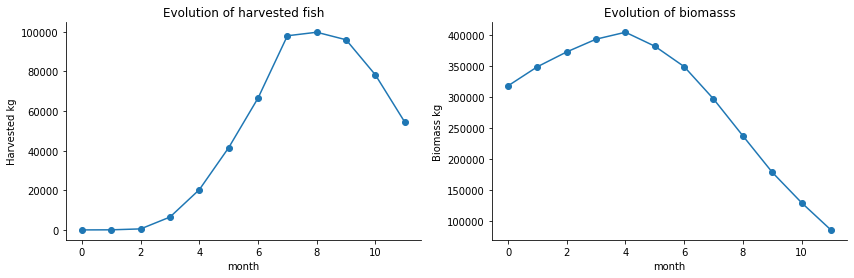

In [27]:
plt.figure(figsize = (14, 4))
plt.subplot(121)
plt.plot(table2['harvested'], marker = 'o')
plt.xlabel('month')
plt.ylabel('Harvested kg')
plt.title(f'Evolution of harvested fish')
sns.despine()

plt.subplot(122)
plt.plot(table2['Biomass'], marker = 'o')
plt.xlabel('month')
plt.ylabel('Biomass kg')
plt.title(f'Evolution of biomasss')
sns.despine()

# Conclusion

- The growth rate in the excel file is not constant

# Plot

In [ ]:
simulated = np.random.normal(loc = 3, scale = 0.7, size = 10000)

In [ ]:
threshold = 4

In [ ]:
plt.hist(simulated, bins = 50)
plt.axvline(x = threshold, c = 'red', linestyle = '--', label = 'Harvestable threshold')
plt.title('Distribution of fish weight')
plt.xlabel('Average fish weight (kg)')
sns.despine()
plt.legend()